# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set up lists to hold reponse info
city_name = []
lat = []
lng = []
High_Temp = []
Humidity = []
Cloudiness = []
wind_speed = []
Country = []
date = []

In [5]:
print("Beginning Data Retrieval")

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


i = 1
for city in cities:
    city = city
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    response = requests.get(query_url + city).json()
    try:
       
        city_name.append(response['name'])
        High_Temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        Cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        Humidity.append(response['main']['humidity'])
        Country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f'Processing Record {i}|{city}')
        i+=1
    except:
        print("City not found. Skipping...")
        pass

print("Data Retrieval Complete")


Beginning Data Retrieval
Processing Record 1|zhezkazgan
Processing Record 2|hermanus
City not found. Skipping...
Processing Record 3|kapaa
Processing Record 4|caravelas
Processing Record 5|vostok
Processing Record 6|poum
City not found. Skipping...
Processing Record 7|barrow
Processing Record 8|atuona
Processing Record 9|solwezi
Processing Record 10|mayskiy
Processing Record 11|kruisfontein
Processing Record 12|ribeira grande
Processing Record 13|ballina
Processing Record 14|tuktoyaktuk
Processing Record 15|ushuaia
Processing Record 16|kaitangata
Processing Record 17|bambous virieux
Processing Record 18|xining
Processing Record 19|bredasdorp
Processing Record 20|belyy yar
Processing Record 21|rikitea
Processing Record 22|dikson
Processing Record 23|jishou
Processing Record 24|punta arenas
Processing Record 25|khatanga
City not found. Skipping...
Processing Record 26|humboldt
Processing Record 27|qaanaaq
Processing Record 28|bani
Processing Record 29|avarua
Processing Record 30|port alf

Processing Record 247|grimshaw
Processing Record 248|tamandare
Processing Record 249|miramar
Processing Record 250|sobolevo
Processing Record 251|zaigrayevo
Processing Record 252|skegness
Processing Record 253|whitehorse
Processing Record 254|neiafu
City not found. Skipping...
Processing Record 255|hobyo
Processing Record 256|sangmelima
Processing Record 257|lukh
City not found. Skipping...
Processing Record 258|banepa
Processing Record 259|nenjiang
City not found. Skipping...
Processing Record 260|vanderhoof
Processing Record 261|damietta
Processing Record 262|ezhou
Processing Record 263|pacific grove
City not found. Skipping...
Processing Record 264|lamas
Processing Record 265|puerto ayacucho
Processing Record 266|woodway
Processing Record 267|aleksandrov gay
Processing Record 268|arkadak
Processing Record 269|makueni
City not found. Skipping...
Processing Record 270|lowestoft
Processing Record 271|rawson
Processing Record 272|souillac
Processing Record 273|nuuk
City not found. Skipp

Processing Record 485|vila franca do campo
Processing Record 486|linjiang
Processing Record 487|coria
Processing Record 488|faya
Processing Record 489|hohhot
Processing Record 490|gulu
Processing Record 491|pauini
Processing Record 492|morlaix
Processing Record 493|guerrero negro
Processing Record 494|cururupu
Processing Record 495|puerto leguizamo
Processing Record 496|sakakah
Processing Record 497|baft
Processing Record 498|bilma
Processing Record 499|penzance
Processing Record 500|veraval
Processing Record 501|mercedes
Processing Record 502|hofn
Processing Record 503|salta
Processing Record 504|cartagena
Processing Record 505|inuvik
Processing Record 506|cuiaba
Processing Record 507|muscle shoals
Processing Record 508|wewak
Processing Record 509|pevek
Processing Record 510|clinton
Processing Record 511|erbaa
Processing Record 512|kodinsk
Processing Record 513|ambulu
Processing Record 514|mogok
Processing Record 515|bowen
Processing Record 516|pangody
Processing Record 517|saanen
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weatherdf = pd.DataFrame({
    "City": city_name,
    "LAT": lat,
    "Long": lng,
    "Max Temp": High_Temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind Speed": wind_speed,
    "Country": Country,
    "Date": date

})
weatherdf

,City,LAT,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhezkazgan,47.8043,67.7144,83.59,27,33,17.11,KZ,1628604670
1,Hermanus,-34.4187,19.2345,61.81,59,0,4.52,ZA,1628604671
2,Kapaa,22.0752,-159.3190,79.12,76,75,10.36,US,1628604671
3,Caravelas,-17.7125,-39.2481,78.39,58,7,6.11,BR,1628604672
4,Vostok,46.4856,135.8833,51.28,72,98,5.88,RU,1628604672
...,...,...,...,...,...,...,...,...,...
568,Mayya,61.7333,130.2811,63.72,62,100,5.68,RU,1628604880
569,Acaraú,-2.8856,-40.1200,89.02,52,3,15.30,BR,1628604881
570,Kinsale,51.7075,-8.5306,65.57,63,20,13.80,IE,1628604881
571,Lensk,60.7253,114.9278,60.26,81,100,2.08,RU,1628604882


In [7]:
weatherdf.to_csv("../output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weatherdf.describe()

,LAT,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,20.694695,14.807633,71.951309,66.034904,55.502618,8.240890,1.628605e+09
std,32.449132,91.893737,15.158853,23.390621,39.043352,5.324213,8.238093e+01
min,-54.800000,-179.166700,33.440000,6.000000,0.000000,0.000000,1.628604e+09
25%,-3.800400,-65.411700,60.820000,54.000000,14.000000,4.140000,1.628605e+09
50%,22.890900,18.821100,74.250000,72.000000,68.000000,7.180000,1.628605e+09
75%,48.366700,96.433300,82.450000,84.000000,94.000000,11.140000,1.628605e+09
max,78.218600,178.416700,114.820000,100.000000,100.000000,35.680000,1.628605e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

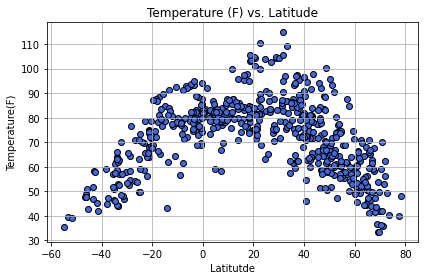

<Figure size 432x288 with 0 Axes>

In [58]:
plt.scatter(weatherdf["LAT"], weatherdf["Max Temp"], facecolors="royalblue", edgecolors="black")
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Latitutde")
plt.ylabel("Temperature(F)")
plt.grid(linestyle="-")
plt.tight_layout()
plt.show()
plt.savefig("../Images/Temperature(F)vs.Latitude.png")

## Latitude vs. Humidity Plot

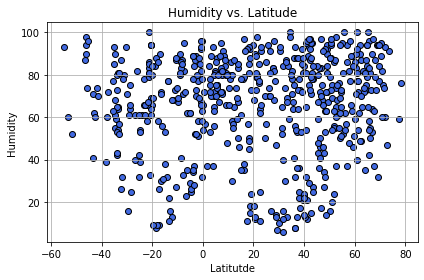

<Figure size 432x288 with 0 Axes>

In [59]:
plt.scatter(weatherdf["LAT"], weatherdf["Humidity"], facecolors="royalblue", edgecolors="black")
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitutde")
plt.ylabel("Humidity")
plt.grid(linestyle="-")
plt.tight_layout()
plt.show()
plt.savefig("../Images/Humidity vs. Latitude.png")

## Latitude vs. Cloudiness Plot

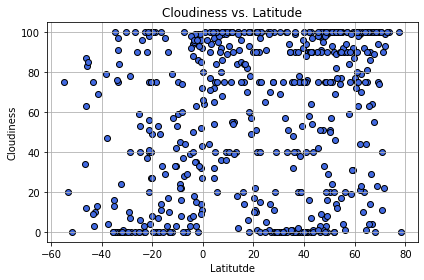

<Figure size 432x288 with 0 Axes>

In [60]:
plt.scatter(weatherdf["LAT"], weatherdf["Cloudiness"], facecolors="royalblue", edgecolors="black")
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitutde")
plt.ylabel("Cloudiness")
plt.grid(linestyle="-")
plt.tight_layout()
plt.show()
plt.savefig("../Images/Cloudiness vs. Latitude.png")

## Latitude vs. Wind Speed Plot

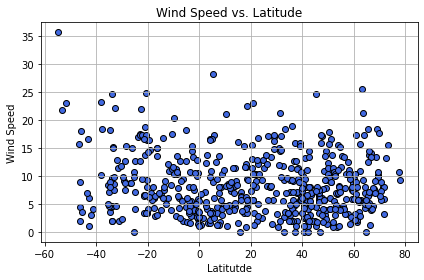

<Figure size 432x288 with 0 Axes>

In [61]:
plt.scatter(weatherdf["LAT"], weatherdf["Wind Speed"], facecolors="royalblue", edgecolors="black")
plt.title("Wind Speed vs. Latitude")
plt.xlabel("Latitutde")
plt.ylabel("Wind Speed")
plt.grid(linestyle="-")
plt.tight_layout()
plt.show()
plt.savefig("../Images/Wind Speed vs. Latitude.png")

## Linear Regression

In [33]:
northdf = weatherdf.loc[weatherdf["LAT"]>=0]
southdf = weatherdf.loc[weatherdf["LAT"]< 0]

#Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.4205091799587332


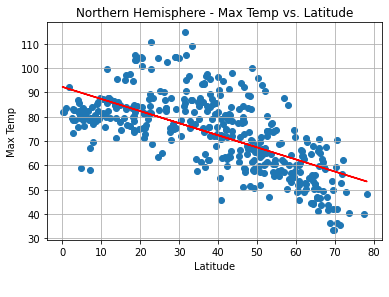

In [43]:
y_values = northdf['Max Temp'].astype('float')
x_values = northdf['LAT'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.grid(linestyle="-")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.6529463078822142


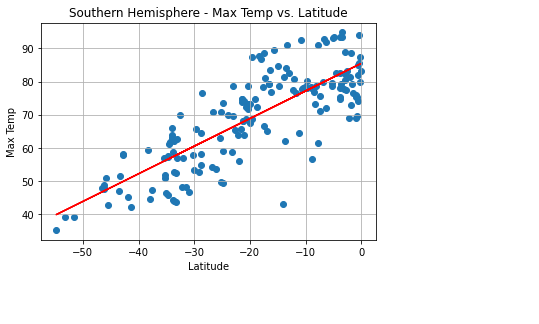

In [42]:
x_values = southdf['LAT'].astype('float')
y_values = southdf['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.grid(linestyle="-")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.002638018298943


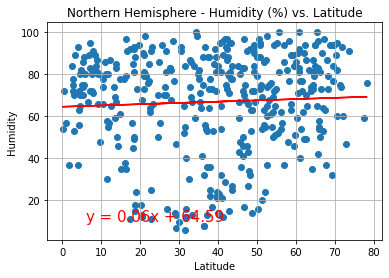

In [40]:
x_values = northdf['LAT'].astype('float')
y_values = northdf['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.grid(linestyle="-")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.003038374759365387


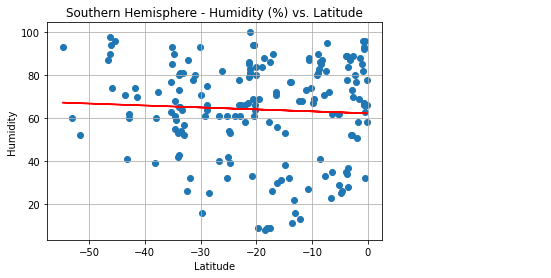

In [44]:
x_values = southdf['LAT'].astype('float')
y_values = southdf['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.grid(linestyle="-")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 2.177037300032985e-06


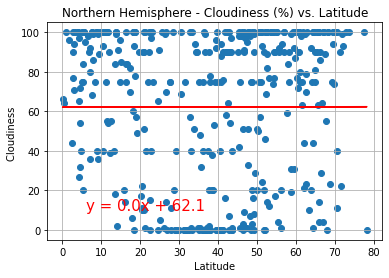

In [46]:
x_values = northdf['LAT'].astype('float')
y_values = northdf['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Cloudiness ')
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.grid(linestyle="-")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.02487898314386387


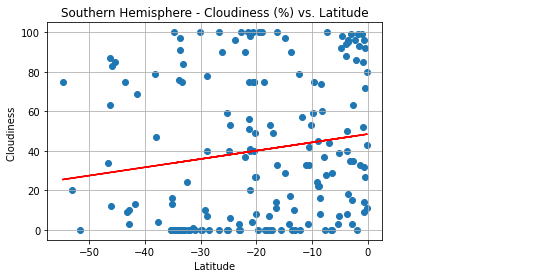

In [47]:
x_values = southdf['LAT'].astype('float')
y_values = southdf['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Cloudiness ')
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.grid(linestyle="-")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.001297753607903127


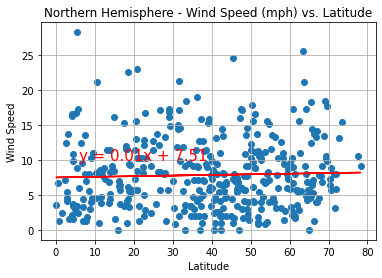

In [49]:
x_values = northdf['LAT'].astype('float')
y_values = northdf['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.grid(linestyle="-")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.07457365531131438


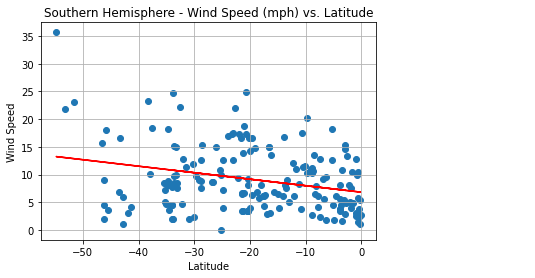

In [51]:
x_values = southdf['LAT'].astype('float')
y_values = southdf['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.grid(linestyle="-")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()